# Assignment 2


## Task 1
**Sol:**

- 1. Maximum of quadratic form $Q(\mathbf{s}) = \mathbf{s^T\Sigma \Sigma^T s}$ with constraint $\Vert \mathbf s \Vert = 1$ euqals to the maximal eigenvalue of $\mathbf{\Sigma \Sigma^T}$, when $\mathbf s=$ unit eigenvector with respect to the maximal eigenvalue.  
$\mathbf{\Sigma \Sigma^T} = diag\left\{\sigma_1^2\ \sigma_2^2\ \cdots\ \sigma_p^2 \right\}$, the eigenvector with respect to maximal eigenvalue $\sigma_1^2$ is $\mathbf e_1=\left[1\ 0\ \cdots\ 0 \right]^T$.  
So, $\mathbf{\hat s}=\left[1\ 0\ \cdots\ 0 \right]^T$.  


- 2. SVD of $\mathbf X$ is $\mathbf{X=U\Sigma V^T}$, where $\mathbf U$ is an orthogonal matrix and all columns of $\mathbf U$ form a set of orthonormal bases of $\mathbb R^p$. So, vector $\mathbf a$ can be written as: $\mathbf{a=Uk}$.   
Note that orthogonal matrices do not change the length of a vector, that is $\mathbf{\Vert k\Vert = \Vert a \Vert = 1}$.  
Then,   
$\dfrac{1}{N}\mathbf{a^TXX^Ta}\\ =\dfrac{1}{N}\mathbf{k^TU^T(U\Sigma V^T )(V\Sigma^TU^T)Uk}\\=\dfrac{1}{N}\mathbf{k^T(U^TU)\Sigma (V^T V)\Sigma^T(U^TU)k}\\=\dfrac{1}{N}\mathbf{k^T\Sigma \Sigma^Tk}$.  
According the conclusion of the last problem,  
$\mathbf{\hat k}=\mathop{argmax}_{\mathbf k,\ s.t., \Vert \mathbf k \Vert = 1 } \mathbf{k^T\Sigma \Sigma^Tk}= \left[1\ 0\ \cdots\ 0 \right]^T$.  
Hence,   
$\mathbf{ \hat a = U\hat k =u_1}$



## Task 2


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from numpy.linalg import svd, norm


fpath = "./data/task2_data/yaleBfaces"
train_subdir = fpath + '/subset0/'
test_subdirs = [fpath + '/subset%d/'%(i+1) for i in range(4)]

# reading images and labels from file
# trainging images
TrainT = np.array( [np.ravel(plt.imread(train_subdir + imgpth)) \
          for imgpth in listdir(train_subdir) ] ).T
# training labels
LabelT = np.array([imgpth.split('_')[0][-2:] for\
                   imgpth in listdir(train_subdir)]).astype('int32')

# list of test images in subsets[1-4]
TestS = [ np.array( [np.ravel(plt.imread(test_subdirs[i] + imgpth)) \
          for imgpth in listdir(test_subdirs[i]) ] ).T for  i in range(4)]

# list of test labels in subsets[1-4]
LabelS =[ np.array([imgpth.split('_')[0][-2:] for\
                   imgpth in listdir(test_subdirs[i])]).astype('int32') for i in range(4) ]

- 1. function `first20SingularVectors` takes vectorized images [T] as input, returns first 20 singular vectors.

In [2]:
def first20SingularVectors(T):
    '''
    find out first 20 principal components of T
    '''
    n_samples = T.shape[1]
    
    center = np.mean(T, axis=1)    # centralize T
    Mu = np.tile(center, (n_samples, 1)).T
    
    u, s, vh = svd(T-Mu) # svd
    
    return np.mat(u[:, 0:20])

 Now display the first 3 principle components.

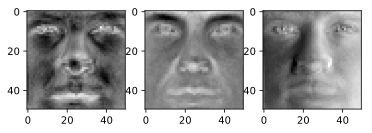

In [3]:
u = first20SingularVectors(TrainT)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# display the first 3 principle components
plt.subplot(1,3,1)
plt.imshow(u[:,0].reshape((50,50)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(u[:,1].reshape((50,50)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(u[:,2].reshape((50,50)), cmap='gray')

- 2. function `evaluateClassification` takes vectorized traing images [`T`], training labels[`LabelT`], test image[`S`], test labels [`LabelS`], and number of PCs [`k`] as input, returns first 20 singular vectors.

In [4]:
def evaluateClassification(T, LabelT, S, LabelS,k, start=0):
    '''
    evaluating the classification result using training set (T, LabelT) and test set (S, LabelS), principle components 
    [start:k] are applied in reducing dimensionality, where default [start] is 0.
    '''
    
    Uk = first20SingularVectors(TrainT)[:, start:k];   # first 20 principal components    
    center = np.mean(T, axis=1)  # mean value of all samples in training set
    
    # centralization
    def centralize(X, center):        
        n_samples = X.shape[1]
        Mu = np.tile(center, (n_samples, 1)).T 
        Xc = X - Mu        
        return np.mat(Xc)
    
    # dimensionality reduction
    Yt = Uk.T * centralize(T, center)
    Ys = Uk.T * centralize(S, center)    
    
    
    # classification and evaluation
    n_train = Yt.shape[1]
    n_tests = Ys.shape[1]
    
    error_rate = 0
    for s in range(n_tests):
        dist = norm(np.tile(Ys[:, s], (1, n_train)) - Yt, axis=0) # euclidean distance
        
        index_nns = np.argsort(dist)[0:3]  
        pred_nns = np.array([LabelT[i] for i in index_nns]) # prediction of 3 nearest neighbours       
        
        prediction = np.bincount(pred_nns).argmax() # the most frequent occurence as final prediction 
        reallabel = LabelS[s]
        
        error_rate += (prediction != reallabel) # mismatch
    return (error_rate/n_tests)


Evaluating through subset 1-4

In [5]:
error_rates = []
for i in range(4):
    print("Evaluating subset %d..."%(i+1))
    error_rate = np.array([evaluateClassification(TrainT, LabelT, TestS[i], LabelS[i], k) \
              for k in range(20)] )
    print("*** Subset %d error rate: %.2f %%"%(i+1, 100*error_rate[-1]))
    error_rates.append(error_rate)
print('Done!')

Evaluating subset 1...
*** Subset 1 error rate: 5.83 %
Evaluating subset 2...
*** Subset 2 error rate: 58.33 %
Evaluating subset 3...
*** Subset 3 error rate: 82.14 %
Evaluating subset 4...
*** Subset 4 error rate: 87.89 %
Done!


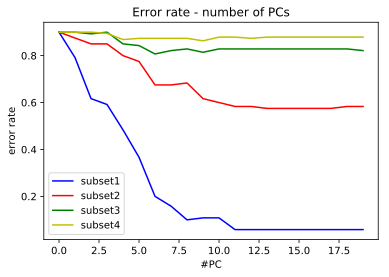

In [6]:
plt.plot(np.arange(20), error_rates[0], 'b-',
         np.arange(20), error_rates[1], 'r-',
         np.arange(20), error_rates[2], 'g-',
         np.arange(20), error_rates[3], 'y-',)
plt.title('Error rate - number of PCs')
plt.xlabel('#PC')
plt.ylabel('error rate')
plt.legend(("subset1",
        "subset2",
        "subset3",
        "subset4")
       )
plt.show()

- 3. Eliminating the first 3 PCs, repeat the evaluation. The prediction error in subset 2 and subset 3 decreased if we drop off the first 3 PCs. PCA is an unsupervised process and is helpful in dimensional reduction, but when projected to principle components, classification of data with different classes could be easier or harder depending on the distribution of each class.

In [7]:
error_rates_2 = []
for i in range(4):
    print("Evaluating subset %d..."%(i+1))
    error_rate = np.array([evaluateClassification(TrainT, LabelT, TestS[i], LabelS[i], k, start=3) \
              for k in range(3, 20)] )
    print("*** Subset %d error rate: %.2f %%"%(i+1, 100*error_rate[-1]))
    error_rates_2.append(error_rate)
print('Done!')



Evaluating subset 1...
*** Subset 1 error rate: 5.83 %
Evaluating subset 2...
*** Subset 2 error rate: 30.83 %
Evaluating subset 3...
*** Subset 3 error rate: 70.00 %
Evaluating subset 4...
*** Subset 4 error rate: 90.53 %
Done!


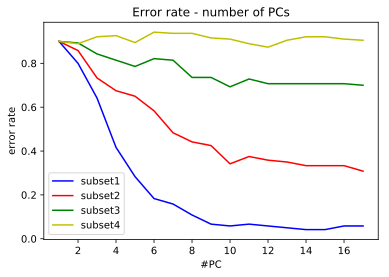

In [8]:
plt.plot(np.arange(1,18), error_rates_2[0], 'b-',
         np.arange(1,18), error_rates_2[1], 'r-',
         np.arange(1,18), error_rates_2[2], 'g-',
         np.arange(1,18), error_rates_2[3], 'y-',)
plt.title('Error rate - number of PCs')
plt.xlabel('#PC')
plt.ylabel('error rate')
plt.legend(("subset1",
        "subset2",
        "subset3",
        "subset4")
       )
plt.show()